# CoDel Test
This test compares the CoDel(and blocking) enabled model vs original model

## test 1: rule 1 is applied 

In [ ]:
if self.minLat <= self.minLatTarget:
    self.curBlockingDur = self.preBlockingDur / 2
else:
    self.curBlockingDur = self.preBlockingDur + self.constLat

latency model:
reqSize, lgMult=820.28, lgAdd=-1114.3, smMult=62.36, smAdd=5905.97, mu=5.1 

In order to see the effect of CoDel and Blocking, we need to compare the two runs:
First run, we **Enable** Blocking mechanism:

In [210]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True
-------- CoDel Parameters --------
target lat = 1700
const lat = 300
----------------------------------
total bytes = 1228754944
total time(s) = 60.0
average throughput(MB/s) = 19.530533854166666


blocing is Enabled
number of priority inversion = 143302 number of txcs = 299994
average bluestore latency(s) = 0.0015429911181574667
average total latency(s) = 0.001622049069756323
average osd queue size = 0.8079287195247968
average kv queue size = 3.618195812807882


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

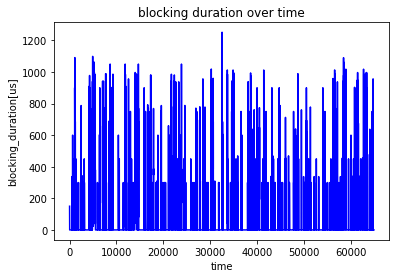

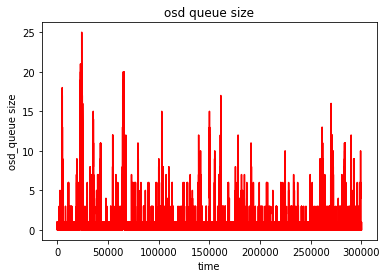

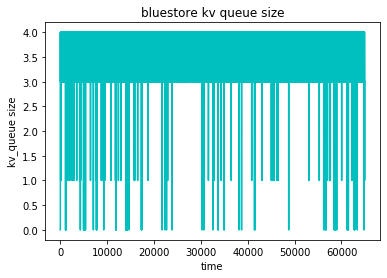

In [203]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]
print("blocing is Enabled")

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

In second run, we **disable** the Blocking mechanism: make sure enableBlocking is **False**

In [211]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = False
-------- CoDel Parameters --------
target lat = 1700
const lat = 300
----------------------------------
total bytes = 1228767232
total time(s) = 60.0
average throughput(MB/s) = 19.530729166666667


blocing is DISABLED
number of priority inversion = 148442 number of txcs = 299992
average bluestore latency(s) = 0.0015509871857993704
average total latency(s) = 0.001561804858156509
average osd queue size = 0.517213448089654
average kv queue size = 3.631298629121897


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

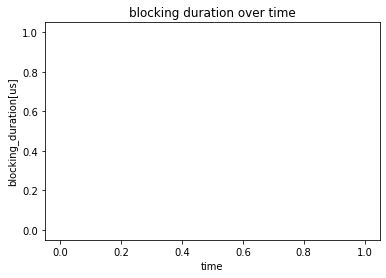

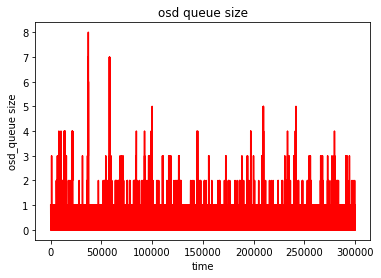

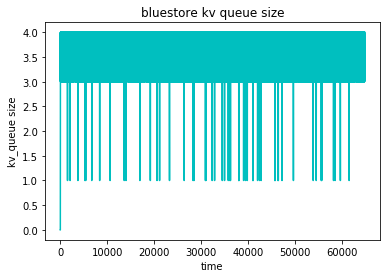

In [212]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]
print("blocing is DISABLED")

priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

## test 2: rule 2 is applied 

In [ ]:
if self.minLat <= self.minLatTarget:
    self.curBlockingDur = self.preBlockingDur / 2
else:
    if self.preBlockingDur == 0:
        self.preBlockingDur = self.constLat
        self.curBlockingDur = self.preBlockingDur * 2

latency model:
reqSize, lgMult=820.28, lgAdd=-1114.3, smMult=62.36, smAdd=5905.97, mu=5.1 

In order to see the effect of CoDel and Blocking, we need to compare the two runs:
First run, we **Enable** Blocking mechanism:

In [219]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True
-------- CoDel Parameters --------
target lat = 1700
const lat = 50
----------------------------------
total bytes = 1228767232
total time(s) = 60.0
average throughput(MB/s) = 19.530729166666667


blocing is Enabled
number of priority inversion = 146758 number of txcs = 299992
average bluestore latency(s) = 0.0015378207686352716
average total latency(s) = 0.0015993873007703451
average osd queue size = 0.7546950313002087
average kv queue size = 3.6093663573228443


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

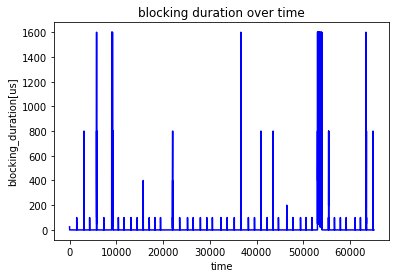

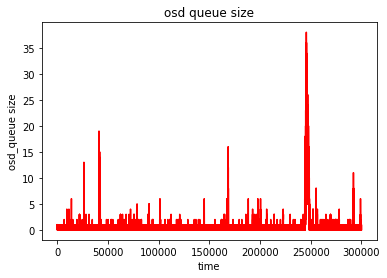

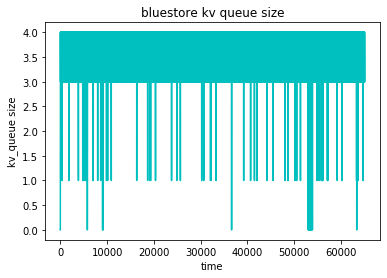

In [220]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]
print("blocing is Enabled")

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

## test 3: rule 3 is applied (too aggressive)

In [ ]:
if self.minLat <= self.minLatTarget:
    if self.preBlockingDur >= self.constLat:
        self.curBlockingDur = self.preBlockingDur - self.constLat
    else:
        self.curBlockingDur = self.constLat
else:
    self.curBlockingDur = self.preBlockingDur * 2

latency model:
reqSize, lgMult=820.28, lgAdd=-1114.3, smMult=62.36, smAdd=5905.97, mu=5.1 

In order to see the effect of CoDel and Blocking, we need to compare the two runs:
First run, we **Enable** Blocking mechanism:

In [236]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True
-------- CoDel Parameters --------
target lat = 1700
const lat = 200
----------------------------------
total bytes = 1228759040
total time(s) = 60.0
average throughput(MB/s) = 19.530598958333332


blocing is Enabled
number of priority inversion = 141442 number of txcs = 299990
average bluestore latency(s) = 0.0015638801145622342
average total latency(s) = 0.0017638790793942098
average osd queue size = 1.3247521650144334
average kv queue size = 3.630910297772495


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

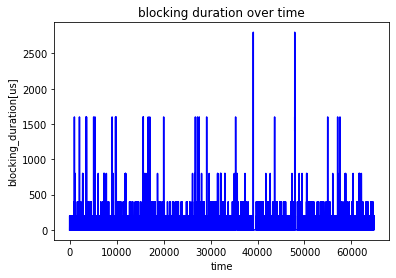

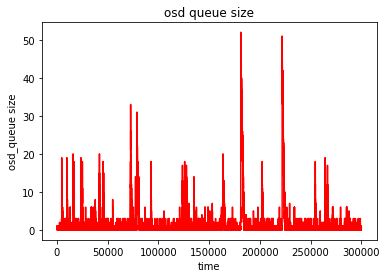

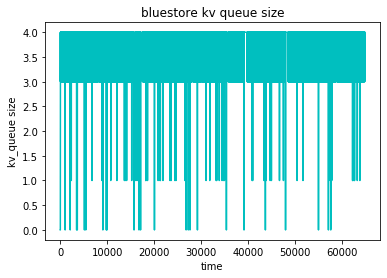

In [237]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]
print("blocing is Enabled")

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

## test 4: rule 4 is applied (too aggressive)

In [ ]:
if self.minLat <= self.minLatTarget:
    self.curBlockingDur = self.preBlockingDur / 2
else:
    if self.preBlockingDur > 0:
        self.curBlockingDur = self.preBlockingDur * 2
    else:
        self.curBlockingDur = self.constLat

latency model:
reqSize, lgMult=820.28, lgAdd=-1114.3, smMult=62.36, smAdd=5905.97, mu=5.1 

In order to see the effect of CoDel and Blocking, we need to compare the two runs:
First run, we **Enable** Blocking mechanism. In this case, we need to initiate `pre blocking duration` to `const latency`. 

In [244]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True
-------- CoDel Parameters --------
target lat = 1700
const lat = 50
----------------------------------
total bytes = 1228754944
total time(s) = 60.0
average throughput(MB/s) = 19.530533854166666


blocing is Enabled
number of priority inversion = 146962 number of txcs = 299989
average bluestore latency(s) = 0.0015510923577749657
average total latency(s) = 0.001591033253559396
average osd queue size = 0.6456743044953633
average kv queue size = 3.6172102257860956


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

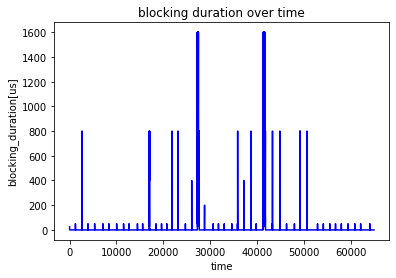

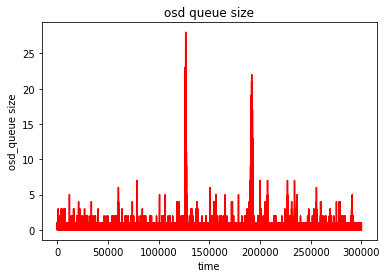

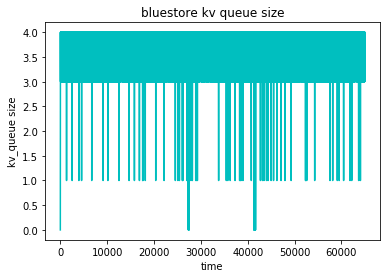

In [245]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]
print("blocing is Enabled")

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

## Unlimited Batch Size
### rule01

In [246]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = False
-------- CoDel Parameters --------
target lat = 1700
const lat = 50
----------------------------------
total bytes = 1228767232
total time(s) = 60.0
average throughput(MB/s) = 19.530729166666667


number of priority inversion = 149996 number of txcs = 299992
average bluestore latency(s) = 0.0014395228884692532
average total latency(s) = 0.0014395228884692532
average osd queue size = 0.5
average kv queue size = 3.5920097964181847


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

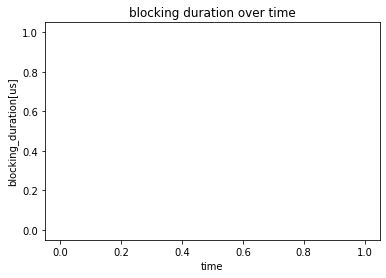

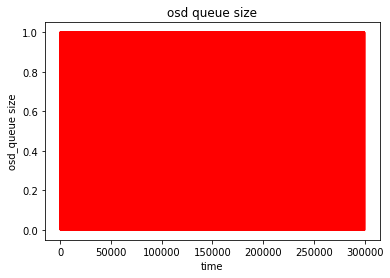

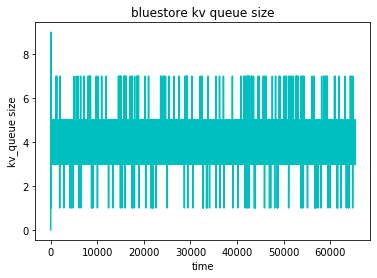

In [248]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

In [267]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True
-------- CoDel Parameters --------
target lat = 1450
const lat = 200
----------------------------------
total bytes = 1228767232
total time(s) = 60.0
average throughput(MB/s) = 19.530729166666667


number of priority inversion = 149758 number of txcs = 299992
average bluestore latency(s) = 0.0014370400533574622
average total latency(s) = 0.0014393186452301165
average osd queue size = 0.5041933612890752
average kv queue size = 3.5930950011482814


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

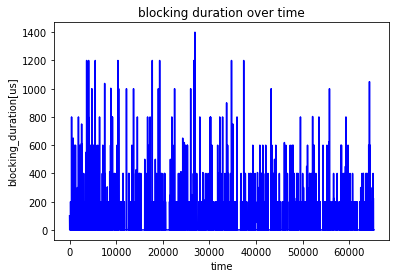

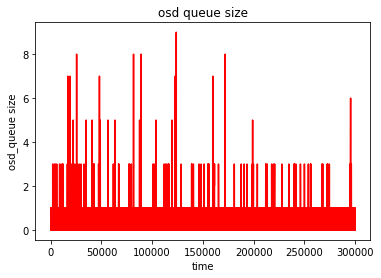

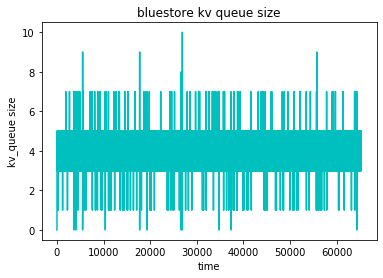

In [268]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

### rule02 (doesn't work)

In [290]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True
-------- CoDel Parameters --------
target lat = 1439
const lat = 30
----------------------------------
total bytes = 1149714432
total time(s) = 60.0
average throughput(MB/s) = 18.27421875


number of priority inversion = 77673 number of txcs = 226422
average bluestore latency(s) = 1.2146996127148517
average total latency(s) = 1.672105269393467
average osd queue size = 6144.97141647611
average kv queue size = 9.306014589846658


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

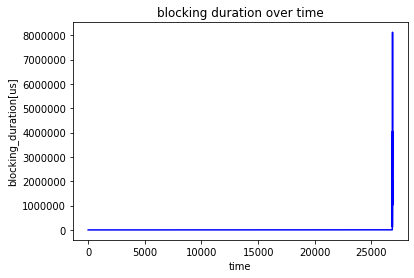

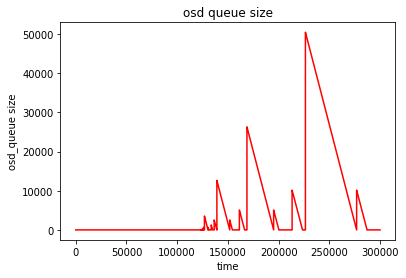

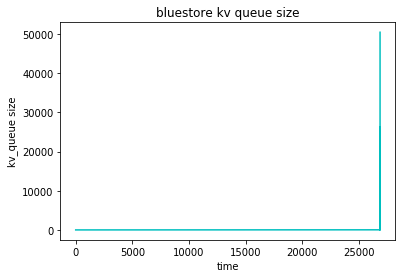

In [289]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

## rule03(doesn't work)

In [302]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True
-------- CoDel Parameters --------
target lat = 1600
const lat = 10
----------------------------------
total bytes = 1228767232
total time(s) = 60.0
average throughput(MB/s) = 19.530729166666667


number of priority inversion = 149996 number of txcs = 299992
average bluestore latency(s) = 0.001434655003025776
average total latency(s) = 0.0014346937912729158
average osd queue size = 0.5
average kv queue size = 3.578793937636411


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

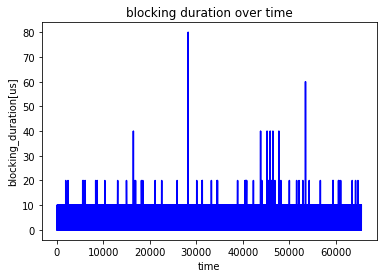

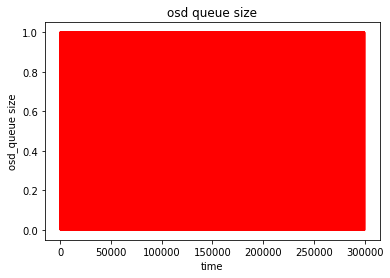

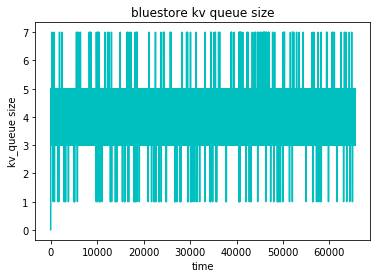

In [303]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

## rule04(doesn't work)

In [316]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True
-------- CoDel Parameters --------
target lat = 1439
const lat = 40
----------------------------------
total bytes = 1228759040
total time(s) = 60.0
average throughput(MB/s) = 19.530598958333332


number of priority inversion = 149993 number of txcs = 299990
average bluestore latency(s) = 0.0014422185746586563
average total latency(s) = 0.0014422401406408228
average osd queue size = 0.5000266668444456
average kv queue size = 3.6051209627901266


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

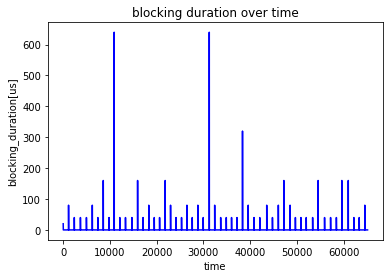

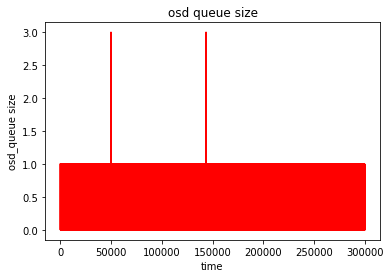

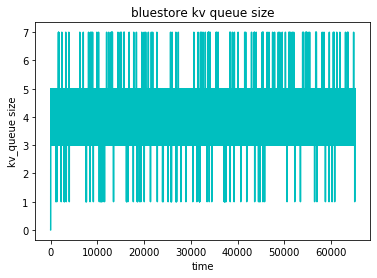

In [317]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

## Rule01

In [339]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = True
-------- CoDel Parameters --------
target lat = 1439
const lat = 160
----------------------------------
total bytes = 12287967232
total time(s) = 600.0
average throughput(MB/s) = 19.531197916666667


number of priority inversion = 1498515 number of txcs = 2999992
average bluestore latency(s) = 0.0014349662724881316
average total latency(s) = 0.0014365756529494782
average osd queue size = 0.5023420015613344
average kv queue size = 3.5860699468320916


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

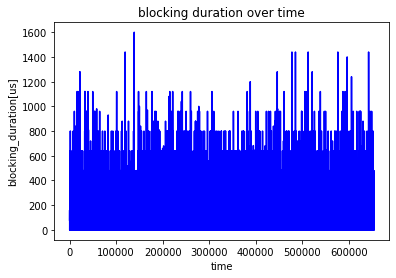

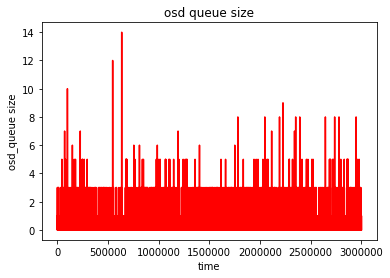

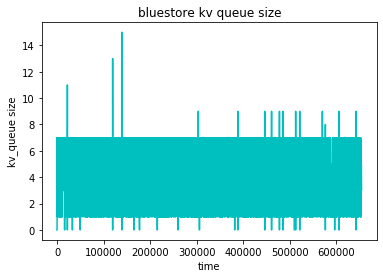

In [340]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]

'''priInv = 0 # number of priority inversion
for i in list(zip(*[iter(bs_lat_vec)]*3)):
    if i[0][0] > i[1][0] or i[1][0] > i[2][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv)'''
priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')

In [352]:
run -i ../../scripts/radossim_blocking.py

enableBlocking = False
-------- CoDel Parameters --------
target lat = 1439
const lat = 160
----------------------------------
total bytes = 12287975424
total time(s) = 600.0
average throughput(MB/s) = 19.5312109375


number of priority inversion = 1499997 number of txcs = 2999994
average bluestore latency(s) = 0.001437351377809301
average total latency(s) = 0.001437351377809301
average osd queue size = 0.5
average kv queue size = 3.588324541587837


[Text(0, 0.5, 'kv_queue size'),
 Text(0.5, 0, 'time'),
 Text(0.5, 1.0, 'bluestore kv queue size')]

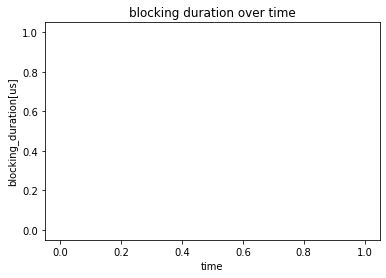

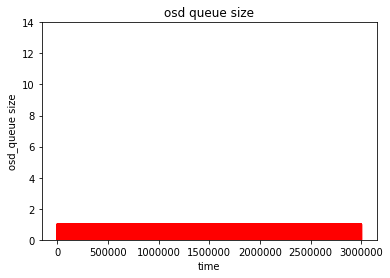

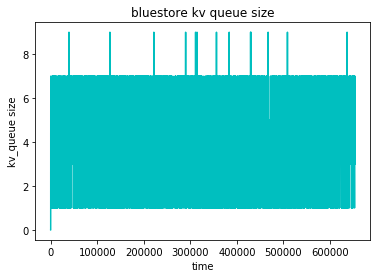

In [353]:
import matplotlib.pyplot as plt
from statistics import mean

# get average bs_lat(bs_lat is the latency in bluestore)
bs_lat_list = [x[1] for x in bs_lat_vec]
total_lat_list = [x[1] for x in total_lat_vec]

priInv = 0 # number of priority inversion
txn_numbers = len(bs_lat_vec)
for i in range(txn_numbers - 1):
    if bs_lat_vec[i][0] < bs_lat_vec[i+1][0]:
        priInv = priInv + 1
print("number of priority inversion =",priInv, "number of txcs =", txn_numbers)

fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(blocking_dur_vec, 'b-')
ax.set(xlabel='time', ylabel='blocking_duration[us]', title='blocking duration over time')

print("average bluestore latency(s) =",mean(bs_lat_list)/1000000)
print("average total latency(s) =",mean(total_lat_list)/1000000)

print("average osd queue size =",mean(osd_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(osd_queue_size_vec, 'r-')
ax.set_ylim(0,14)
ax.set(xlabel='time', ylabel='osd_queue size', title='osd queue size')

print("average kv queue size =",mean(kv_queue_size_vec))
fig, ax = plt.subplots()
ax.plot(kv_queue_size_vec, 'c-')
ax.set(xlabel='time', ylabel='kv_queue size', title='bluestore kv queue size')